In [247]:
using RDatasets
using Plots
theme(:dark)
using CSV

### Wisconsin Breast Cancer Database (January 8, 1991)

In this project, the KNN algorithm is used to classify breast cancer. The dataset contains 699 instances. The data details are further explained below. Furthermore, this dataset suffers from class imbalance, a phenomenon common in the health industry. The majority class is benign cancer, with 458 instances (65.5% of the dataset). This class imbalance does affect the performance of an algorithm and the reliability of results. 

I have not dealt with the class imbalance. Nevertheless, I used a subset of the dataset with balanced classes to show how this algorithm works effectively. Following I used the entire dataset and compared the results based on error metric.

``All instances were used except for column 1(id) and 7 ``


   ####  Attributes                   
   -- -----------------------------------------
   1. Sample code number          
   2. Clump Thickness               
   3. Uniformity of Cell Size       
   4. Uniformity of Cell Shape      
   5. Marginal Adhesion             
   6. Single Epithelial Cell Size   
   7. Bare Nuclei                   
   8. Bland Chromatin               
   9. Normal Nucleoli              
   10. Mitoses                       
   11. Class:(2 for benign, 4 for malignant)


Class distribution:
* Benign: 458 (65.5%)
* Malignant: 241 (34.5%)


#### The KNN Algorithm

* Load the data
* Initialize $k$ to your chosen number of neighbors
* For each example in the data
    * Calculate the distance between the query example and the current example from the data.
    * Add the distance and the index of the example to an ordered collection
* Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
* Pick the first $K$ entries from the sorted collection
* Get the labels of the selected $k$ entries
* For classification, return the mode of the $K$ labels

#### Load Data:

In [249]:
bcancer = CSV.read("breast-cancer-wisconsin.csv", header = false)

X_data = [x for x in zip(bcancer.Column2, bcancer.Column3,bcancer.Column4, bcancer.Column5,
            bcancer.Column6,bcancer.Column8,bcancer.Column9,
            bcancer.Column10)]
X_data = X_data
Y_data = [i == 2 ?  "Benign Cancer" : "Malignant Cancer"  for i in bcancer[:, 11]];

#### Functions:

In [257]:
function euclidean_distance(p1, p2)
    """Define the Euclidean distance function"""
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1:length(p1)]))
end

function k_nearest_neighbors(p, X, Y, k)
    distance_array = [(X[i], Y[i], euclidean_distance(p, X[i])) 
                      for i = 1:length(X)
                      if X[i] != p
                      ]
    sort!(distance_array, by = x -> x[3])   
    return distance_array[1:k]      
end 


function classify_cancer(index::Int64, X, Y, k)
    """ Classify individual examples """
    point = X[index]
    neighbors = k_nearest_neighbors(point, X, Y, k)
    Benign = sum([1 for x in neighbors if x[2] == "Benign Cancer"])
    Malignant = sum([1 for x in neighbors if x[2] == "Malignant Cancer"])
    
    return findmax([Benign, Malignant])[2] == 1 ? "Benign Cancer" : "Malignant Cancer"
end

function error(X,Y,k)
    """Returns The proportion of misclassified examples."""
    error = 0
    for i in 1:length(Y)
        error += sum(classify_cancer(i,  X, Y, k)!= Y[i])
    end
    return error/length(Y)
end
    
function find_best_k(X,Y,max_k, show_img = false, pointcolor = "yellow")
    """ Calculates the optimum k given the minimum error """
    ks = []
    for i in 1:max_k
        push!(ks,error(X, Y, i))
    end
    println("Best K = ",findmin(ks)[2])
    println("Error = ",findmin(ks)[1])
    if show_img == true
        plot(xaxis = "K Nearest Neighbors",
        yaxis = "Error", 
        title = "Breast Cancer Error Plot")
        plot!(ks, label = "Error")
        scatter!((findmin(ks)[2],findmin(ks)[1]), color = pointcolor, label = "Best k")
    end
    if show_img == true
        plot!()
    end
    
end
        

find_best_k (generic function with 3 methods)

#### KNN with Subset Balanced Dataset:

Best K = 3
Error = 0.04


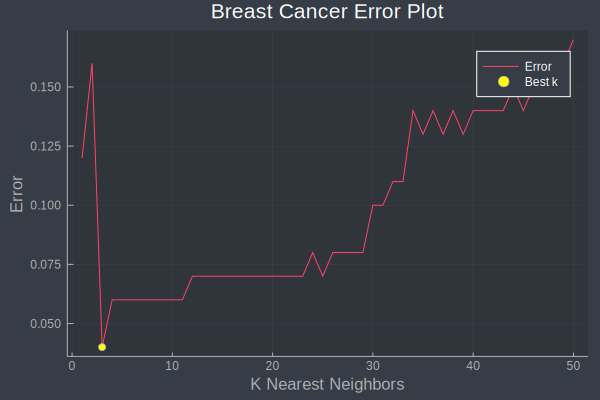

In [258]:
find_best_k(X_data[1:100],Y_data[1:100],50, true)

#### KNN with Entire Dataset:

Best K = 12
Error = 0.03862660944206009


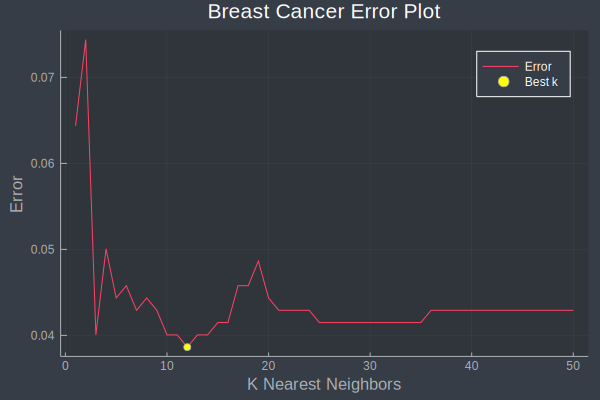

In [259]:
find_best_k(X_data,Y_data,50, true)

#### The algorithm has a similar performance for the balanced and imbalanced dataset.

### Reference

1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.


2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.
